In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 20

%matplotlib inline

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
df = pd.read_csv('./low_coverage_parameter_comparison_1.csv').reset_index()
df.columns = ("filter_scaling,depth,batch_size,fold,batch_norm_momentum,final_epoch,random_seed,highest_val_acc,lowest_val_loss," + \
                            "threshold_max,mAP_max,threshold_max_class_1,mAP_max_class_1").split(',')

In [6]:
df.sort_values('mAP_max_class_1', ascending=False).head(50)
df.groupby(['filter_scaling','depth','batch_size','batch_norm_momentum']).agg(np.mean)

fold  final_epoch  \
filter_scaling depth batch_size batch_norm_momentum                      
32.0           4.0   64.0       0.6                   2.5        29.50   
               5.0   64.0       0.6                   2.5        34.75   
               6.0   64.0       0.6                   2.5        34.00   
48.0           4.0   64.0       0.6                   2.5        31.75   
               5.0   64.0       0.6                   2.5        34.25   
               6.0   64.0       0.6                   2.5        34.25   
64.0           4.0   64.0       0.6                   2.5        35.75   
               5.0   64.0       0.6                   2.5        36.75   
               6.0   64.0       0.6                   2.5        41.50   
80.0           4.0   64.0       0.6                   2.5        32.50   
               5.0   64.0       0.6                   2.5        37.50   
96.0           4.0   64.0       0.6                   2.5        28.00   
112.0          4.0   64.0       0.6                   2.5        26.50   
128.0          4.0   64.0       0.6                   2.5        36.50   

                                                      random_seed  \
filter_scaling depth batch_size batch_norm_momentum                 
32.0           4.0   64.0       0.6                  1.665535e+09   
               5.0   64.0       0.6                  2.109510e+09   
               6.0   64.0       0.6                  2.622884e+09   
48.0           4.0   64.0       0.6                  1.394947e+09   
               5.0   64.0       0.6                  2.239001e+09   
               6.0   64.0       0.6                  3.139029e+09   
64.0           4.0   64.0       0.6                  2.929976e+09   
               5.0   64.0       0.6                  2.667837e+09   
               6.0   64.0       0.6                  1.915769e+09   
80.0           4.0   64.0       0.6                  2.556346e+09   
               5.0   64.0       0.6                  2.173327e+09   
96.0           4.0   64.0       0.6                  1.586701e+09   
112.0          4.0   64.0       0.6                  3.432099e+09   
128.0          4.0   64.0       0.6                  2.355172e+09   

                                                     highest_val_acc  \
filter_scaling depth batch_size batch_norm_momentum                    
32.0           4.0   64.0       0.6                         0.983643   
               5.0   64.0       0.6                         0.984393   
               6.0   64.0       0.6                         0.983936   
48.0           4.0   64.0       0.6                         0.986308   
               5.0   64.0       0.6                         0.985407   
               6.0   64.0       0.6                         0.983529   
64.0           4.0   64.0       0.6                         0.983450   
               5.0   64.0       0.6                         0.984408   
               6.0   64.0       0.6                         0.985108   
80.0           4.0   64.0       0.6                         0.983387   
               5.0   64.0       0.6                         0.985039   
96.0           4.0   64.0       0.6                         0.983818   
112.0          4.0   64.0       0.6                         0.984526   
128.0          4.0   64.0       0.6                         0.983604   

                                                     lowest_val_loss  \
filter_scaling depth batch_size batch_norm_momentum                    
32.0           4.0   64.0       0.6                         0.054387   
               5.0   64.0       0.6                         0.048259   
               6.0   64.0       0.6                         0.051988   
48.0           4.0   64.0       0.6                         0.042670   
               5.0   64.0       0.6                         0.045134   
               6.0   64.0       0.6                         0.055733   
64.0           4.0   64.0       0.

In [47]:
cov = pd.read_csv('./low_coverage_agged.csv', skiprows=range(3,1000,3))

cov['filter_scaling'] = np.array([[x, x] for x in df['filter_scaling']]).flatten()
cov['depth'] = np.array([[x, x] for x in df['depth']]).flatten()
cov['batch_size'] = np.array([[x, x] for x in df['batch_size']]).flatten()
cov['fold'] = np.array([[x, x] for x in df['fold']]).flatten()
cov['batch_norm_momentum'] = np.array([[x, x] for x in df['batch_norm_momentum']]).flatten()

In [48]:
# cov[cov['covcat']==1].sort_values(['covcat','depth','filter_scaling'])

In [49]:
covagg = cov.groupby(['covcat','filter_scaling','depth','batch_size','batch_norm_momentum']).agg(np.mean).reset_index()
covagg

,covcat,filter_scaling,depth,batch_size,batch_norm_momentum,count,mean,amax,amin,fold
0,1.0,32.0,4.0,64.0,0.6,115,0.304565,0.975,0.0,2.5
1,1.0,32.0,5.0,64.0,0.6,115,0.326304,1.000,0.0,2.5
2,1.0,32.0,6.0,64.0,0.6,115,0.326087,1.000,0.0,2.5
3,1.0,48.0,4.0,64.0,0.6,115,0.322174,1.000,0.0,2.5
4,1.0,48.0,5.0,64.0,0.6,115,0.338261,1.000,0.0,2.5
5,1.0,48.0,6.0,64.0,0.6,115,0.315435,1.000,0.0,2.5
6,1.0,64.0,4.0,64.0,0.6,115,0.325870,1.000,0.0,2.5
7,1.0,64.0,5.0,64.0,0.6,115,0.368043,0.975,0.0,2.5
8,1.0,64.0,6.0,64.0,0.6,115,0.342609,1.000,0.0,2.5
9,1.0,80.0,4.0,64.0,0.6,115,0.356739,1.000,0.0,2.5


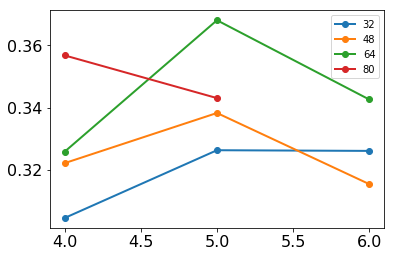

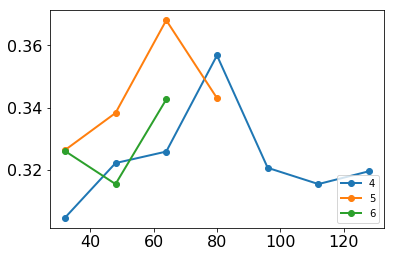

In [50]:
currdf = covagg[covagg['covcat']==1]
dfplot = currdf[currdf['filter_scaling']==32]; plt.plot(dfplot['depth'],dfplot['mean'], 'o-', label='32')
dfplot = currdf[currdf['filter_scaling']==48]; plt.plot(dfplot['depth'],dfplot['mean'], 'o-', label='48')
dfplot = currdf[currdf['filter_scaling']==64]; plt.plot(dfplot['depth'],dfplot['mean'], 'o-', label='64')
dfplot = currdf[currdf['filter_scaling']==80]; plt.plot(dfplot['depth'],dfplot['mean'], 'o-', label='80')
plt.legend(loc='upper right'); plt.show()
dfplot = currdf[currdf['depth']==4]; plt.plot(dfplot['filter_scaling'],dfplot['mean'], 'o-', label='4')
dfplot = currdf[currdf['depth']==5]; plt.plot(dfplot['filter_scaling'],dfplot['mean'], 'o-', label='5')
dfplot = currdf[currdf['depth']==6]; plt.plot(dfplot['filter_scaling'],dfplot['mean'], 'o-', label='6')
plt.legend(loc='lower right'); plt.show()

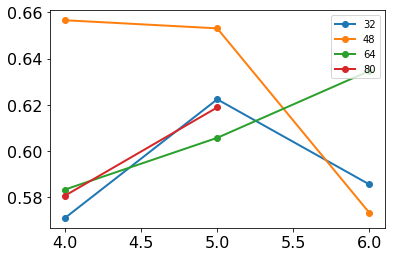

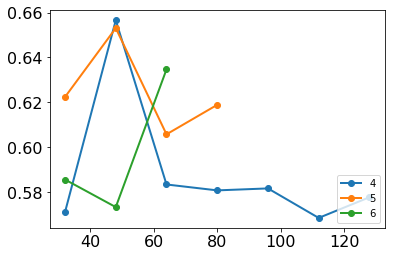

In [51]:
currdf = covagg[covagg['covcat']==2]
dfplot = currdf[currdf['filter_scaling']==32]; plt.plot(dfplot['depth'],dfplot['mean'], 'o-', label='32')
dfplot = currdf[currdf['filter_scaling']==48]; plt.plot(dfplot['depth'],dfplot['mean'], 'o-', label='48')
dfplot = currdf[currdf['filter_scaling']==64]; plt.plot(dfplot['depth'],dfplot['mean'], 'o-', label='64')
dfplot = currdf[currdf['filter_scaling']==80]; plt.plot(dfplot['depth'],dfplot['mean'], 'o-', label='80')
plt.legend(loc='upper right'); plt.show()
dfplot = currdf[currdf['depth']==4]; plt.plot(dfplot['filter_scaling'],dfplot['mean'], 'o-', label='4')
dfplot = currdf[currdf['depth']==5]; plt.plot(dfplot['filter_scaling'],dfplot['mean'], 'o-', label='5')
dfplot = currdf[currdf['depth']==6]; plt.plot(dfplot['filter_scaling'],dfplot['mean'], 'o-', label='6')
plt.legend(loc='lower right'); plt.show()